In [731]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import missingno as msno 
import seaborn as sns

In [5]:
pd.set_option("display.max_columns", 101)

In [6]:
df = pd.read_csv('~/documents/notes/data.csv', index_col = False)

In [7]:
df.head(100)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [30]:
df .describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.

In [28]:
#dropped unnessasary cloumnns

df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [732]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2891 entries, 0 to 8391
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Club                      2891 non-null   object
 1   Playing_in_League         2891 non-null   object
 2   ID                        2891 non-null   object
 3   Name                      2891 non-null   object
 4   Age                       2891 non-null   object
 5   Nationality               2891 non-null   object
 6   Overall                   2891 non-null   object
 7   Potential                 2891 non-null   object
 8   Value                     2891 non-null   object
 9   Wage                      2891 non-null   object
 10  Special                   2891 non-null   object
 11  Preferred Foot            2891 non-null   object
 12  International Reputation  2891 non-null   object
 13  Weak Foot                 2891 non-null   object
 14  Skill Moves             

In [31]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking

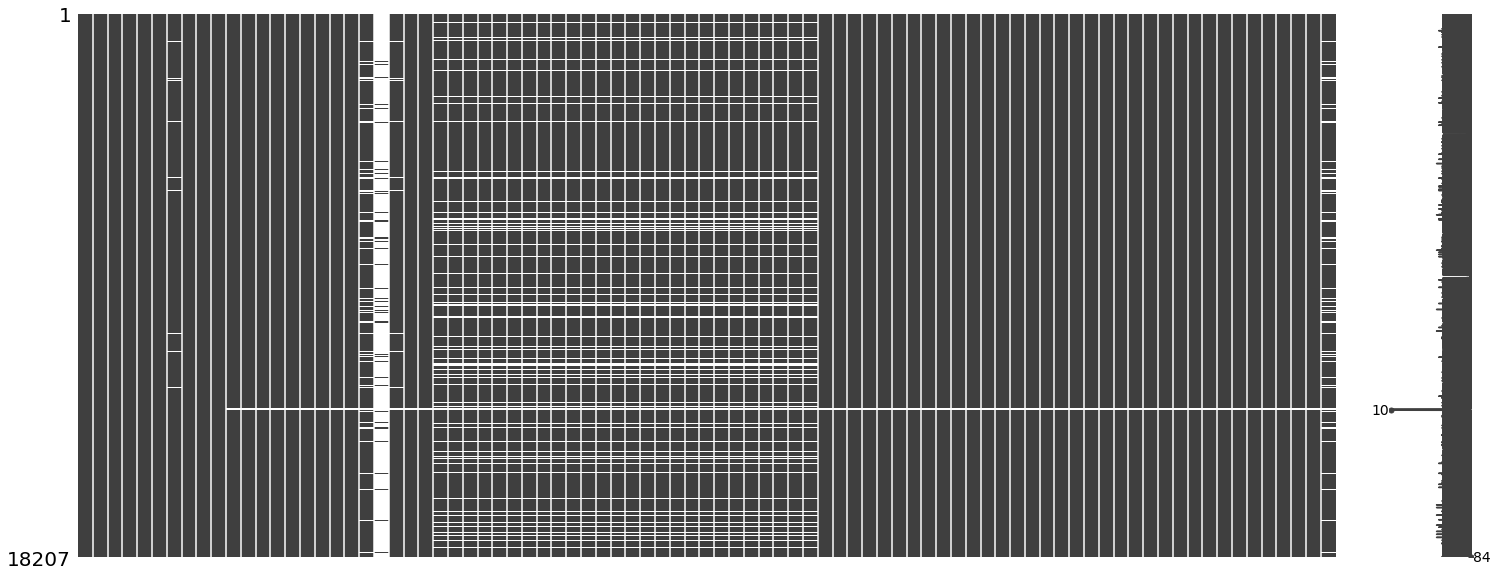

In [38]:
msno.matrix(df)


In [42]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS                           2085
LW                           2085
LF                           2085
CF            

In [43]:
df['Club'].nunique()

651

# Data Cleaning and Feature Engineering

In [8]:
df2 = pd.read_csv('~/documents/notes/fifa19.csv', index_col = False)

In [9]:
df2.head()

,Club,Playing_in_League,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,Real Madrid,Spain Primera Division (1),177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,https://cdn.sofifa.org/teams/2/light/243.png,€67M,€420K,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,10.0,"Aug 1, 2012",NaN,2020,5'8,146lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
1,Real Madrid,Spain Primera Division (1),155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,https://cdn.sofifa.org/teams/2/light/243.png,€51M,€380K,2201,Right,4.0,3.0,3.0,High/ Medium,Normal,Yes,RCB,15.0,"Aug 1, 2005",NaN,2020,6'0,181lbs,73+3,73+3,73+3,70+3,71+3,71+3,71+3,70+3,71+3,71+3,71+3,72+3,75+3,75+3,75+3,72+3,81+3,84+3,84+3,84+3,81+3,84+3,87+3,87+3,87+3,84+3,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
2,Real Madrid,Spain Primera Division (1),182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,https://cdn.sofifa.org/teams/2/light/243.png,€76.5M,€355K,2190,Right,4.0,5.0,3.0,Medium/ Medium,Normal,Yes,LCM,8.0,"Jul 17, 2014",NaN,2022,6'0,168lbs,78+3,78+3,78+3,81+3,82+3,82+3,82+3,81+3,84+3,84+3,84+3,82+3,86+3,86+3,86+3,82+3,79+3,82+3,82+3,82+3,79+3,77+3,72+3,72+3,72+3,77+3,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
3,Real Madrid,Spain Primera Division (1),192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,https://cdn.sofifa.org/teams/2/light/243.png,€53.5M,€240K,1311,Left,4.0,2.0,1.0,Medium/ Medium,Courtois,Yes,GK,1.0,"Aug 9, 2018",NaN,2024,6'6,212lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
4,Real Madrid,Spain Primera Division (1),200145,Casemiro,26,https://cdn.sofifa.org/players/4/19/200145.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,90,https://cdn.sofifa.org/teams/2/light/243.png,€59.5M,€285K,2170,Right,3.0,3.0,2.0,Medium/ High,Normal,Yes,CDM,14.0,"Jul 11, 2013",NaN,2021,6'1,185lbs,72+3,72+3,72+3,69+3,73+3,73+3,73+3,69+3,74+3,74+3,74+3,71+3,80+3,80+3,80+3,71+3,78+3,85+3,85+3,85+3,78+3,79+3,85+3,85+3,85+3,79+3,52.0,59.0,76.0,85.0,53.0,69.0,59.0,74.0,82.0,78.0,59.0,65.0,62.0,84.0,66.0,86.0,88.0,87.0,89.0,79.0,87.0,87.0,69.0,77.0,66.0,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,€126.4M


In [10]:
df2.sort_values(by=['Overall'], ascending = False).head(50)

,Club,Playing_in_League,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
189,Juventus,Italian Serie A (1),20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
99,FC Barcelona,Spain Primera Division (1),158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
214,Paris Saint-Germain,French Ligue 1 (1),190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
0,Real Madrid,Spain Primera Division (1),177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,https://cdn.sofifa.org/teams/2/light/243.png,€67M,€420K,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,10.0,"Aug 1, 2012",NaN,2020,5'8,146lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
33,Manchester United,English Premier League (1),193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
1,Real Madrid,Spain Primera Division (1),155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,https://cdn.sofifa.org/teams/2/light/243.png,€51M,€380K,2201,Right,4.0,3.0,3

In [11]:
df2.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000
mean,213628.292952,25.044726,66.450930,71.617230,1603.075012,1.123467,2.952711,2.375184,19.658182,49.978410,45.731600,52.467554,58.906587,43.191855,55.639720,47.518523,43.069001,52.923700,58.662905,64.661494,64.776435,63.605986,62.046860,63.906219,55.787782,65.179404,63.298209,65.459396,47.334642,56.162414,46.866413,50.112488,53.627699,48.686396,58.938911,47.421860,47.936887,45.889966,16.629784,16.401742,16.236261,16.407875,16.724853
std,30597.625486,4.686098,7.006805,6.165413,275.013540,0.411339,0.662086,0.763759,16.005064,18.451726,19.578524,17.434510,14.756144,17.836719,18.998032,18.494344,17.561758,15.337578,16.734841,15.010632,14.736114,14.768842,9.121009,14.188654,17.266215,11.856955,15.935846,12.501009,19.328131,17.415729,20.789746,19.614936,14.189991,15.757333,11.509419,20.008307,21.738039,21.372031,17.749709,16.964664,16.555921,17.081548,18.014439
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,6.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,8.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,199420.500000,21.000000,62.000000,67.000000,1461.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,45.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,56.000000,56.000000,56.000000,46.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,39.000000,44.000000,39.000000,52.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221335.500000,25.000000,66.000000,71.000000,1642.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,63.000000,44.000000,61.000000,49.000000,42.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,60.000000,66.000000,67.000000,67.000000,52.000000,59.000000,52.000000,55.000000,55.000000,50.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236464.500000,28.000000,71.000000,76.000000,1794.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,65.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,69.000000,73.000000,74.000000,74.000000,63.000000,70.000000,64.000000,65.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.

In [12]:
df2.drop(['Photo','Flag','Club Logo'],axis=1,inplace=True)

In [13]:
df2['Playing_in_League'].unique()

array(['Spain Primera Division (1)', 'English Premier League (1)',
       'Italian Serie A (1)', 'French Ligue 1 (1)',
       'German 1. Bundesliga (1)', 'Portuguese Liga ZON SAGRES (1)',
       'Holland Eredivisie (1)', 'Turkish Süper Lig (1)',
       'Scottish Premiership (1)', 'Belgian Jupiler Pro League (1)',
       'English League Championship (2)', 'German 2. Bundesliga (2)',
       'Rest of World', 'Argentina Primera División \xa0(1)',
       'Austrian Football Bundesliga (1)', 'USA Major League Soccer (1)',
       'English League One (3)', 'Italian Serie B (2)',
       'Colombian Liga Postobón (1)', 'Mexican Liga MX (1)',
       'Spanish Segunda División (2)',
       'Campeonato Brasileiro Série A (1)', 'English League Two (4)',
       'Danish Superliga (1)', 'Swiss Super League (1)',
       'French Ligue 2 (2)', 'Polish T-Mobile Ekstraklasa (1)',
       'Norwegian Eliteserien (1)', 'Chinese Super League (1)',
       'Japanese J. League Division 1 (1)', 'German 3. Bundesliga (3

In [251]:
#select top 5 leauges in Europe:
df=df2[(df2["Playing_in_League"]=='Italian Serie A (1)')|
    (df2["Playing_in_League"]=='French Ligue 1 (1)')|(df2["Playing_in_League"]=='English Premier League (1)')|
    (df2["Playing_in_League"]=='Spain Primera Division (1)') |(df2["Playing_in_League"]=='German 1. Bundesliga (1)')]

In [252]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000
mean,208972.880829,24.720898,72.574784,78.037651,1719.212090,1.443099,3.050502,2.640263,20.524732,55.293670,49.816672,56.607748,65.028018,48.006572,61.427188,52.998270,46.992736,58.468004,64.937392,65.923210,66.069872,65.308544,68.710827,64.549637,60.935316,66.560706,64.544448,67.060879,52.451055,60.117606,51.847804,54.710827,58.931857,51.719128,65.556209,52.054652,52.609478,50.228641,17.398478,17.093047,16.687305,17.134556,17.510896
std,30740.911362,4.592386,7.378586,5.374274,298.761702,0.716438,0.693177,0.883895,16.008032,20.341153,21.563689,19.239730,15.881141,19.950205,20.597909,20.255897,19.248447,16.291291,18.216097,14.750156,14.469487,14.374198,9.579358,14.461207,18.431683,11.786158,16.084219,12.199712,21.078300,18.391231,23.274836,21.770335,15.429621,16.882988,11.558182,22.316126,24.284716,24.217854,19.940907,19.079944,18.225323,19.244166,20.244905
min,768.000000,16.000000,50.000000,58.000000,792.000000,1.000000,1.000000,1.000000,1.000000,7.000000,5.000000,8.000000,11.000000,4.000000,5.000000,6.000000,7.000000,10.000000,9.000000,13.000000,16.000000,21.000000,33.000000,20.000000,11.000000,26.000000,13.000000,24.000000,5.000000,11.000000,3.000000,2.000000,12.000000,9.000000,13.000000,3.000000,9.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,192984.500000,21.000000,68.000000,75.000000,1553.000000,1.000000,3.000000,2.000000,9.000000,43.000000,32.000000,48.000000,60.000000,33.000000,55.000000,40.000000,33.000000,49.000000,61.000000,58.000000,58.000000,57.000000,63.000000,56.000000,51.500000,60.000000,56.000000,60.000000,37.000000,48.000000,28.000000,42.000000,48.500000,42.000000,59.000000,31.000000,29.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,212190.000000,24.000000,74.000000,78.000000,1784.000000,1.000000,3.000000,3.000000,18.000000,61.000000,54.000000,60.000000,69.000000,50.000000,68.000000,57.000000,46.000000,62.000000,70.000000,68.000000,68.000000,67.000000,70.000000,66.000000,66.000000,68.000000,68.000000,68.000000,58.000000,65.000000,59.000000,61.000000,61.000000,53.000000,67.000000,59.000000,62.000000,58.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,232103.000000,28.000000,77.000000,82.000000,1943.000000,2.000000,3.000000,3.000000,28.000000,71.000000,68.000000,70.000000,76.000000,64.000000,75.000000,69.000000,62.500000,70.000000,76.000000,76.000000,76.000000,76.000000,75.000000,75.000000,75.000000,74.500000,76.000000,76.000000,69.000000,74.000000,73.000000,71.000000,71.000000,64.000000,74.000000,71.000000,74.000000,72.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246616.000000,40.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,93.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,94.000000,94.000000,94.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


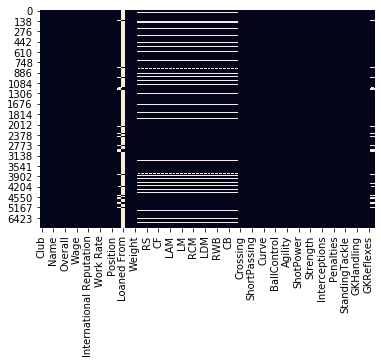

In [253]:
#Checked for missing values 
sns.heatmap(df.isnull(), cbar=False)

In [254]:
df.columns

Index(['Club', 'Playing_in_League', 'ID', 'Name', 'Age', 'Nationality',
       'Overall', 'Potential', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GK

In [255]:
#dropped more unnecessary colummns
df.drop(['Jersey Number','Loaned From' ],axis=1,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [462]:
df.head(30)

,Club,Playing_in_League,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,years_left_contract,Continent,position
0,Real Madrid,Spain Primera Division (1),177003,L. Modrić,32,Croatia,91,91,67000000.0,420000.0,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,2020-01-01,68,146,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,2,Europe,Midfield
1,Real Madrid,Spain Primera Division (1),155862,Sergio Ramos,32,Spain,91,91,51000000.0,380000.0,2201,Right,4.0,3.0,3.0,High/ Medium,Normal,Yes,RCB,2020-01-01,72,181,73+3,73+3,73+3,70+3,71+3,71+3,71+3,70+3,71+3,71+3,71+3,72+3,75+3,75+3,75+3,72+3,81+3,84+3,84+3,84+3,81+3,84+3,87+3,87+3,87+3,84+3,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,2,Europe,Defence
2,Real Madrid,Spain Primera Division (1),182521,T. Kroos,28,Germany,90,90,76500000.0,355000.0,2190,Right,4.0,5.0,3.0,Medium/ Medium,Normal,Yes,LCM,2022-01-01,72,168,78+3,78+3,78+3,81+3,82+3,82+3,82+3,81+3,84+3,84+3,84+3,82+3,86+3,86+3,86+3,82+3,79+3,82+3,82+3,82+3,79+3,77+3,72+3,72+3,72+3,77+3,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,4,Europe,Midfield
3,Real Madrid,Spain Primera Division (1),192119,T. Courtois,26,Belgium,89,90,53500000.0,240000.0,1311,Left,4.0,2.0,1.0,Medium/ Medium,Courtois,Yes,GK,2024-01-01,78,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,6,Europe,Goalkeeper
4,Real Madrid,Spain Primera Division (1),200145,Casemiro,26,Brazil,88,90,59500000.0,285000.0,2170,Right,3.0,3.0,2.0,Medium/ High,Normal,Yes,CDM,2021-01-01,73,185,72+3,72+3,72+3,69+3,73+3,73+3,73+3,69+3,74+3,74+3,74+3,71+3,80+3,80+3,80+3,71+3,78+3,85+3,85+3,85+3,78+3,79+3,85+3,85+3,85+3,79+3,52.0,59.0,76.0,85.0,53.0,69.0,59.0,74.0,82.0,78.0,59.0,65.0,62.0,84.0,66.0,86.0,88.0,87.0,89.0,79.0,87.0,87.0,69.0,77.0,66.0,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,3,South America,Midfield
5,Real Madrid,Spain Primera Division (1),197781,Isco,26,Spain,88,91,73500000.0,315000.0,2137,Right,3.0,3.0,4.0,High/ Medium,Normal,Yes,LW,2022-01-01,69,174,76+3,76+3,76+3,84+3,83+3,83+3,83+3,84+3,86+3,86+3,86+3,83+3,83+3,83+3,83+3,83+3,72+3,73+3,73+3,73+3,72+3,68+3,63+3,63+3,63+3,68+3,75.0,79.0,55.0,89.0,65.0,94.0,88.0,76.0,83.0,95.0,75.0,69.0,87.0,77.0,90.0,69.0,64.0,70.0,59.0,87.0,58.0,64.0,78.0,89.0,76.0,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,4,Europe,Attack
6,Real Madrid,Spain Primera Division (1),176676,Marcelo,30,Brazil,88,88,43000000.0,285000.0,2279,Left,4.0,4.0,5.0,High/ Low,Normal,Yes,LB,2022-01-01,69,176,80+3,80+3,80+3,84+3,83+3,83+3,83+3,84+3,84+3,84+3,84+3,85+3,84+3,84+3,84+3,85+3,85+3,83+3,83+3,83+3,85+3,84+3,81+3,81+3,81+3,84+3,90.0,70.0,75.0,84.0,54.0,90.0,85.0,67.0,76.0,92.0,83.0,82.0,86.0,88.0,86.0,83.0,76.0,91.0,78.0,70.0,84.0,85.0,85.0,82.0,59.0,86.0,71.0,85.0,86.0,12.0,

In [257]:
#just a search
df[df['Club']=='Manchester City']

,Club,Playing_in_League,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
271,Manchester City,English Premier League (1),192985,K. De Bruyne,27,Belgium,91,92,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
272,Manchester City,English Premier League (1),168542,David Silva,32,Spain,90,90,€60M,€285K,2115,Left,4.0,2.0,4.0,High/ Medium,Normal,Yes,LCM,"Jul 14, 2010",2020,5'8,148lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,85+3,85+3,85+3,85+3,85+3,69+3,70+3,70+3,70+3,69+3,64+3,57+3,57+3,57+3,64+3,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
273,Manchester City,English Premier League (1),153079,S. Agüero,30,Argentina,89,89,€64.5M,€300K,2107,Right,4.0,4.0,4.0,High/ Medium,Stocky,Yes,ST,"Jul 28, 2011",2021,5'8,154lbs,86+3,86+3,86+3,86+3,87+3,87+3,87+3,86+3,85+3,85+3,85+3,83+3,76+3,76+3,76+3,83+3,58+3,56+3,56+3,56+3,58+3,53+3,47+3,47+3,47+3,53+3,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M
274,Manchester City,English Premier League (1),222492,L. Sané,22,Germany,86,92,€61M,€195K,2090,Left,2.0,3.0,4.0,High/ Medium,Lean,Yes,LW,"Aug 2, 2016",2021,6'0,165lbs,82+2,82+2,82+2,84+2,84+2,84+2,84+2,84+2,82+2,82+2,82+2,83+2,74+2,74+2,74+2,83+2,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2,83.0,81.0,72.0,79.0,85.0,88.0,82.0,68.0,64.0,85.0,93.0,96.0,88.0,81.0,81.0,86.0,64.0,79.0,70.0,78.0,61.0,34.0,84.0,82.0,71.0,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,€125.1M
275,Manchester City,English Premier League (1),218667,Bernardo Silva,23,Portugal,86,91,€59.5M,€180K,2039,Left,2.0,3.0,4.0,High/ Medium,Lean,Yes,RW,"Jul 1, 2017",2022,5'8,141lbs,75+2,75+2,75+2,84+2,82+2,82+2,82+2,84+2,84+2,84+2,84+2,84+2,80+2,80+2,80+2,84+2,68+2,65+2,65+2,65+2,68+2,63+2,53+2,53+2,53+2,63+2,85.0,75.0,51.0,85.0,69.0,92.0,83.0,67.0,79.0,91.0,84.0,74.0,90.0,82.0,88.0,70.0,50.0,78.0,48.0,72.0,58.0,49.0,83.0,86.0,68.0,85.0,49.0,44.0,35.0,9.0,10.0,14.0,12.0,9.0,€114.5M
276,Manchester City,English Premier League (1),210257,Ederson,24,Brazil,86,90,€41.5M,€125K,1463,Left,2.0,3.0,1.0,Medium/ Medium,Normal,Yes,GK,"Jul 1, 2017",2025,6'2,190lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,14.0,14.0,56.0,18.0,23.0,15.0,20.0,58.0,37.0,64.0,63.0,60.0,86.0,48.0,42.0,58.0,41.0,68.0,18.0,35.0,25.0,20.0,67.0,17.0,70.0,28.0,15.0,8.0,85.0,80.0,91.0,82.0,87.0,€79.9M
277,Manchester City,English Premier League (1),202652,R. Sterling,23,England,86,89,€56.5M,€195K,2036,Right,3.0,3.0,4.0,High/ Medium,Lean,Yes,RW,"Jul 14, 2015",2023,5'7,152lbs,76+3,76+3,76+3,84+3,83+3,83+3,83+3,84+3,83+3,83+3,83+3,84+3,77+3,77+3,77+3,84+3,69+3,63+3,63+3,63+3,69+3,66+3,52+3,52+3,52+3,66+3,77.0,77.0,38.0,84.0,67.0,88.0,70.0,63.0,69.0,87.0,95.0,92.0,93.0,87.0,93.0,73.0,57.0,78.0,52.0,73.0,38.0,30.0,87.0,77.0,69.0,77.0,47.0,58.0,54.0,15.0,12

In [258]:
#check for null
df.Value.isnull().sum()

0

In [259]:
# # clean up the target variable (Value), convert the K to 1000 the M to millions and remove the euros
# df['Value'] = df['Value'].str.replace('€','')
# df['Value'] = df['Value'].str.replace('M',' 1000000')
# df['Value'] = df['Value'].str.replace('K',' 1000')
# df['Value'] = df['Value'].str.split(' ', expand=True)[0].astype(float) * df['Value'].str.split(' ', expand=True)[1].astype(float)


In [260]:
#function to clean the column with currency notations and value abbrevations

def clean_values(value):
    remove= value.replace('€', '')
    if 'M'in remove:
        remove= float(remove.replace('M', ''))*1000000
    elif 'K'in value:
        remove= float(remove.replace('K', ''))*1000
    return float(remove)
    

In [261]:
# clean up the target variable (Value), convert the K to 1000 the M to millions and remove the euros
df['Value'] = df['Value'].apply(lambda x: clean_values(x))
#clean wages
df['Wage'] = df['Wage'].apply(lambda x: clean_values(x))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [262]:
#clean realease clause

df['Release Clause'] = df['Release Clause'].replace('€', '')
# df['Release Clause'] = df['Release Clause'].replace('', '')
df['Release Clause'] = df['Release Clause'].apply(lambda x: str(x))
df['Release Clause'] = df['Release Clause'].apply(lambda x: clean_values(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [263]:
df['Release Clause'].unique()#value_counts()

array([1.374e+08, 1.046e+08, 1.568e+08, 1.137e+08, 1.264e+08, 1.562e+08,
       8.820e+07, 1.230e+08, 6.250e+07, 1.063e+08, 1.215e+08, 7.590e+07,
       6.690e+07, 5.540e+07, 5.210e+07, 5.630e+07, 4.160e+07, 4.250e+07,
       3.600e+07, 1.540e+07, 3.040e+07, 4.680e+07, 1.910e+07, 3.200e+06,
       2.700e+06, 2.600e+06, 2.000e+06, 2.300e+06, 2.200e+06, 1.600e+06,
       2.100e+06, 7.880e+05, 1.386e+08, 1.232e+08, 1.203e+08, 6.940e+07,
       8.710e+07, 4.440e+07, 4.530e+07, 5.100e+07, 4.310e+07, 3.240e+07,
       3.080e+07, 1.850e+07, 3.180e+07, 1.670e+07, 2.970e+07, 2.310e+07,
       2.130e+07, 1.300e+07, 2.870e+07, 1.110e+07, 2.500e+06, 9.600e+06,
       7.800e+06, 4.300e+06, 2.900e+06, 1.400e+06, 1.700e+06, 1.373e+08,
       1.027e+08, 8.790e+07, 1.047e+08, 7.210e+07, 6.720e+07, 4.840e+07,
       3.420e+07, 4.370e+07, 3.160e+07, 3.610e+07, 2.570e+07, 3.850e+07,
       2.960e+07, 2.950e+07, 2.270e+07, 1.520e+07, 2.940e+07, 3.050e+07,
       2.370e+07, 1.780e+07, 1.380e+07, 9.900e+06, 

In [280]:
df.Height.isnull().sum()

4

In [179]:
# df['Height']= df['Height'].apply(lambda x:x.split("'"))


AttributeError: 'float' object has no attribute 'split'

In [297]:
#checked for null values in  heights
df[df['Height'].isnull()]

,Club,Playing_in_League,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
672,Everton,English Premier League (1),233782,M. Feeney,19,England,62,78,600000.0,5000.0,1328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2117,VfB Stuttgart,German 1. Bundesliga (1),246328,A. Aidonis,17,Germany,62,82,550000.0,2000.0,1418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3029,Bologna,Italian Serie A (1),245564,Vinicius,19,Brazil,62,77,525000.0,1000.0,1141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4190,Montpellier HSC,French Ligue 1 (1),244543,Y. Ammour,19,France,62,77,650000.0,2000.0,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [298]:
#drop missing values in height column
df.dropna(subset=['Height'], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [275]:
#function to clean the height columns # its a float object, so index and change to in
def clean_height(ht):
    ht= str(ht)
    ht= ht.strip(" ")
    ht= ht.split("'")
    return((int(ht[0])*12)+int(ht[1]))
    

In [299]:
#clean the heights
df['Height']= df['Height'].map(lambda x: clean_height (x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
#df['Height']= pd.to_numeric(df['Height'])

ValueError: Unable to parse string "['5', '8']" at position 0

In [115]:
# # Examining duplicate rows
# df.loc[df.duplicated(), :].sort_values('Name')

,Club,Playing_in_League,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


In [139]:
df.Height= df.Height.astype(str)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [326]:
df.head()

,Club,Playing_in_League,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,Real Madrid,Spain Primera Division (1),177003,L. Modrić,32,Croatia,91,91,67000000.0,420000.0,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,2012-08-01,2020-01-01,68,146,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
1,Real Madrid,Spain Primera Division (1),155862,Sergio Ramos,32,Spain,91,91,51000000.0,380000.0,2201,Right,4.0,3.0,3.0,High/ Medium,Normal,Yes,RCB,2005-08-01,2020-01-01,72,181,73+3,73+3,73+3,70+3,71+3,71+3,71+3,70+3,71+3,71+3,71+3,72+3,75+3,75+3,75+3,72+3,81+3,84+3,84+3,84+3,81+3,84+3,87+3,87+3,87+3,84+3,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
2,Real Madrid,Spain Primera Division (1),182521,T. Kroos,28,Germany,90,90,76500000.0,355000.0,2190,Right,4.0,5.0,3.0,Medium/ Medium,Normal,Yes,LCM,2014-07-17,2022-01-01,72,168,78+3,78+3,78+3,81+3,82+3,82+3,82+3,81+3,84+3,84+3,84+3,82+3,86+3,86+3,86+3,82+3,79+3,82+3,82+3,82+3,79+3,77+3,72+3,72+3,72+3,77+3,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,156800000.0
3,Real Madrid,Spain Primera Division (1),192119,T. Courtois,26,Belgium,89,90,53500000.0,240000.0,1311,Left,4.0,2.0,1.0,Medium/ Medium,Courtois,Yes,GK,2018-08-09,2024-01-01,78,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,113700000.0
4,Real Madrid,Spain Primera Division (1),200145,Casemiro,26,Brazil,88,90,59500000.0,285000.0,2170,Right,3.0,3.0,2.0,Medium/ High,Normal,Yes,CDM,2013-07-11,2021-01-01,73,185,72+3,72+3,72+3,69+3,73+3,73+3,73+3,69+3,74+3,74+3,74+3,71+3,80+3,80+3,80+3,71+3,78+3,85+3,85+3,85+3,78+3,79+3,85+3,85+3,85+3,79+3,52.0,59.0,76.0,85.0,53.0,69.0,59.0,74.0,82.0,78.0,59.0,65.0,62.0,84.0,66.0,86.0,88.0,87.0,89.0,79.0,87.0,87.0,69.0,77.0,66.0,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,126400000.0


In [303]:
#function to clean the weights
def clean_weight(wt):
    wt= wt.replace("lbs", "")
    wt = int(wt)
    return wt

In [304]:
#clean weight column
df['Weight']= df['Weight'].map(lambda x: clean_weight (x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [325]:
# clean year joined (date joined) and contract valid until column change to datetime 
df['Joined']= pd.to_datetime(df['Joined'])
df['Contract Valid Until']= pd.to_datetime(df['Contract Valid Until'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [309]:
type(df['Contract Valid Until'])

pandas.core.series.Series

In [350]:
df.head(50)

,Club,Playing_in_League,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,years_left_contract,Continent,position
0,Real Madrid,Spain Primera Division (1),177003,L. Modrić,32,Croatia,91,91,67000000.0,420000.0,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,2020-01-01,68,146,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,2,Europe,Midfield
1,Real Madrid,Spain Primera Division (1),155862,Sergio Ramos,32,Spain,91,91,51000000.0,380000.0,2201,Right,4.0,3.0,3.0,High/ Medium,Normal,Yes,RCB,2020-01-01,72,181,73+3,73+3,73+3,70+3,71+3,71+3,71+3,70+3,71+3,71+3,71+3,72+3,75+3,75+3,75+3,72+3,81+3,84+3,84+3,84+3,81+3,84+3,87+3,87+3,87+3,84+3,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,2,Europe,Defence
2,Real Madrid,Spain Primera Division (1),182521,T. Kroos,28,Germany,90,90,76500000.0,355000.0,2190,Right,4.0,5.0,3.0,Medium/ Medium,Normal,Yes,LCM,2022-01-01,72,168,78+3,78+3,78+3,81+3,82+3,82+3,82+3,81+3,84+3,84+3,84+3,82+3,86+3,86+3,86+3,82+3,79+3,82+3,82+3,82+3,79+3,77+3,72+3,72+3,72+3,77+3,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,4,Europe,Midfield
3,Real Madrid,Spain Primera Division (1),192119,T. Courtois,26,Belgium,89,90,53500000.0,240000.0,1311,Left,4.0,2.0,1.0,Medium/ Medium,Courtois,Yes,GK,2024-01-01,78,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,6,Europe,Goalkeeper
4,Real Madrid,Spain Primera Division (1),200145,Casemiro,26,Brazil,88,90,59500000.0,285000.0,2170,Right,3.0,3.0,2.0,Medium/ High,Normal,Yes,CDM,2021-01-01,73,185,72+3,72+3,72+3,69+3,73+3,73+3,73+3,69+3,74+3,74+3,74+3,71+3,80+3,80+3,80+3,71+3,78+3,85+3,85+3,85+3,78+3,79+3,85+3,85+3,85+3,79+3,52.0,59.0,76.0,85.0,53.0,69.0,59.0,74.0,82.0,78.0,59.0,65.0,62.0,84.0,66.0,86.0,88.0,87.0,89.0,79.0,87.0,87.0,69.0,77.0,66.0,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,3,South America,Midfield
5,Real Madrid,Spain Primera Division (1),197781,Isco,26,Spain,88,91,73500000.0,315000.0,2137,Right,3.0,3.0,4.0,High/ Medium,Normal,Yes,LW,2022-01-01,69,174,76+3,76+3,76+3,84+3,83+3,83+3,83+3,84+3,86+3,86+3,86+3,83+3,83+3,83+3,83+3,83+3,72+3,73+3,73+3,73+3,72+3,68+3,63+3,63+3,63+3,68+3,75.0,79.0,55.0,89.0,65.0,94.0,88.0,76.0,83.0,95.0,75.0,69.0,87.0,77.0,90.0,69.0,64.0,70.0,59.0,87.0,58.0,64.0,78.0,89.0,76.0,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,4,Europe,Attack
6,Real Madrid,Spain Primera Division (1),176676,Marcelo,30,Brazil,88,88,43000000.0,285000.0,2279,Left,4.0,4.0,5.0,High/ Low,Normal,Yes,LB,2022-01-01,69,176,80+3,80+3,80+3,84+3,83+3,83+3,83+3,84+3,84+3,84+3,84+3,85+3,84+3,84+3,84+3,85+3,85+3,83+3,83+3,83+3,85+3,84+3,81+3,81+3,81+3,84+3,90.0,70.0,75.0,84.0,54.0,90.0,85.0,67.0,76.0,92.0,83.0,82.0,86.0,88.0,86.0,83.0,76.0,91.0,78.0,70.0,84.0,85.0,85.0,82.0,59.0,86.0,71.0,85.0,86.0,12.0,

In [313]:
pd.DatetimeIndex(df['Joined']).year

Float64Index([2012.0, 2005.0, 2014.0, 2018.0, 2013.0, 2013.0, 2007.0, 2013.0,
              2014.0, 2011.0,
              ...
              2012.0, 2015.0, 2018.0, 2018.0, 2018.0,    nan,    nan, 2017.0,
              2017.0, 2018.0],
             dtype='float64', name='Joined', length=2891)

In [327]:
#creating a different column called contract lenght which would be the years left on contract. Might be useful
df['years_left_contract']= pd.DatetimeIndex(df['Contract Valid Until']).year.map(lambda x: int(x)-2018) 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


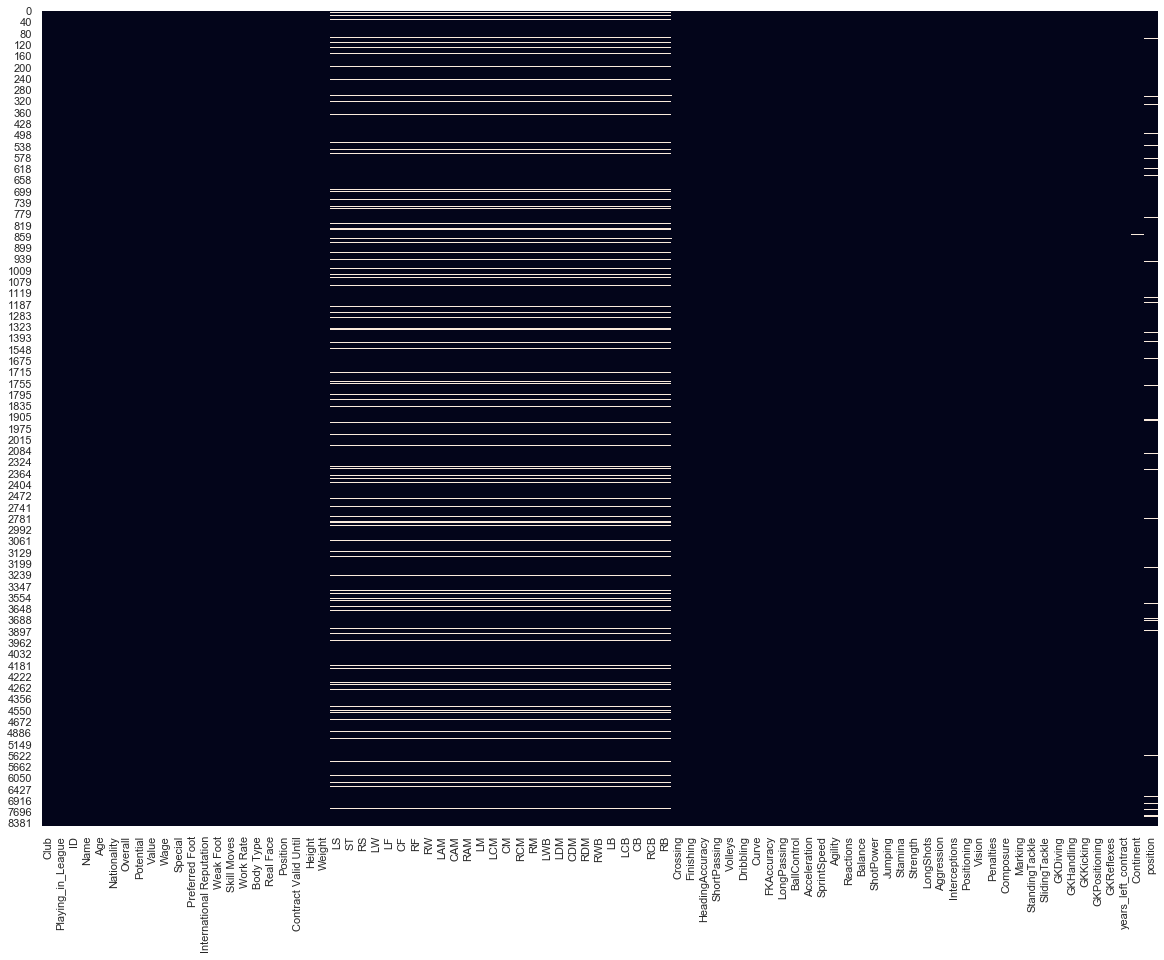

In [464]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.isnull(), cbar=False)

In [330]:
#saved data frame in df3 just incase
df3=df

In [331]:
#drop unnnecessary columns (joined and realease clause)
df.drop(columns= ['Joined','Release Clause'], axis=1,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [334]:
#creating a dictionary of continents 
# mapping countries to their continents - dictionary
continents = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia', 'New Zealand'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}

In [335]:
# function to countries to their continents - dictionary, takes in the country, returns a continent it belongs to from dictionary
def find_continent(x, continents_list):
    for key in continents_list:
        if x in continents_list[key]:
            return key
    return np.NaN



In [337]:
#create columns with players mapped to there continents
df['Continent'] = df['Nationality'].apply(lambda x: find_continent(x, continents))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [347]:
# Dictionary for defining grouped player positions
#mapping players to position category
pos_dict = {
    'Attack' : ['ST','RW','LW', 'CF'],
    'Midfield': ['RM', 'CM', 'LM', 'CAM', 'CDM', 'RCM', 'LCM'],
    'Defence': ['CB', 'LB', 'RB', 'RWB', 'LWB', 'RCB', 'LCB'],
    'Goalkeeper': ['GK']}
pos_dict
#function to map abbreivations to actual postitions
def find_position(x, pos_list):
    for key in pos_list:
        if x in pos_list[key]:
            return key
    return np.NaN

In [348]:
#creating a new column called position to map the abbrevations to the actual positions
df['position'] = df['Position'].apply(lambda x: find_position(x, pos_dict))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [544]:
df['Body Type'].unique()

array(['Lean', 'Normal', 'Courtois', 'Stocky', 'PLAYER_BODY_TYPE_25',
       'Shaqiri', 'Messi', 'C. Ronaldo', 'Neymar'], dtype=object)

In [617]:
#clean body type

df.loc[df['Body Type'] == 'PLAYER_BODY_TYPE_25', 'Body Type'] = 'Normal'
df.loc[df['Body Type'] == 'Messi', 'Body Type'] = 'Lean'
df.loc[df['Body Type'] == 'Shaqiri', 'Body Type'] = 'Stocky'
df.loc[df['Body Type'] == 'Neymar', 'Body Type'] = 'Lean'
df.loc[df['Body Type'] == 'Akinfenwa', 'Body Type'] = 'Stocky'
df.loc[df['Body Type'] == 'C. Ronaldo', 'Body Type'] = 'Normal'
df.loc[df['Body Type'] == 'Courtois', 'Body Type'] = 'Normal'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [622]:
df[(df['Body Type'] == 'Stocky')].sort_values(by= "Weight", ascending= False)#& (df['Nationality']=='Argentina')]

,Club,Playing_in_League,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,years_left_contract,Continent,position
897,Leicester City,English Premier League (1),136113,W. Morgan,34,Jamaica,75,75,2e+06,50000,1428,Right,2,2,2,Medium/ High,Stocky,Yes,RCB,2019-01-01 00:00:00,73,223,48+2,48+2,48+2,44+2,48+2,48+2,48+2,44+2,49+2,49+2,49+2,46+2,55+2,55+2,55+2,46+2,57+2,66+2,66+2,66+2,57+2,60+2,74+2,74+2,74+2,60+2,17,19,76,55,23,58,14,18,47,61,30,30,28,76,48,52,73,50,87,35,79,75,39,49,17,68,76,76,75,14,10,6,7,8,1,North America,Defence
885,Leicester City,English Premier League (1),203263,H. Maguire,25,England,82,85,2.35e+07,77000,1853,Right,1,3,2,High/ High,Stocky,Yes,LCB,2023-01-01 00:00:00,76,220,64+2,64+2,64+2,60+2,64+2,64+2,64+2,60+2,65+2,65+2,65+2,63+2,70+2,70+2,70+2,63+2,70+2,77+2,77+2,77+2,70+2,71+2,81+2,81+2,81+2,71+2,44,43,87,77,41,70,38,46,72,76,39,53,52,79,58,68,74,68,89,45,84,78,60,60,44,79,81,84,81,14,16,9,14,9,5,Europe,Defence
1318,Newcastle United,English Premier League (1),189250,S. Rondón,28,Venezuela,77,77,9e+06,41000,1763,Right,2,4,3,High/ Medium,Stocky,Yes,RS,2019-06-30 00:00:00,73,216,75+2,75+2,75+2,67+2,71+2,71+2,71+2,67+2,67+2,67+2,67+2,66+2,60+2,60+2,60+2,66+2,50+2,50+2,50+2,50+2,50+2,48+2,49+2,49+2,49+2,48+2,48,75,84,68,75,70,53,52,40,71,69,68,66,73,46,85,71,72,85,68,72,33,77,53,65,76,36,23,13,13,13,7,5,14,1,South America,NaN
833,Wolverhampton Wanderers,English Premier League (1),163600,J. Ruddy,31,England,72,72,1.9e+06,31000,1073,Right,2,3,1,Medium/ Medium,Stocky,Yes,GK,2020-01-01 00:00:00,76,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,7,12,25,11,11,13,13,23,24,38,43,23,73,22,24,68,36,71,15,24,22,15,39,18,53,11,11,11,72,66,73,72,73,2,Europe,Goalkeeper
709,Bayer 04 Leverkusen,German 1. Bundesliga (1),213331,J. Tah,22,Germany,83,88,2.95e+07,67000,1673,Right,2,4,2,Medium/ Medium,Stocky,No,CB,2023-01-01 00:00:00,77,214,52+2,52+2,52+2,52+2,53+2,53+2,53+2,52+2,57+2,57+2,57+2,57+2,64+2,64+2,64+2,57+2,70+2,76+2,76+2,76+2,70+2,73+2,81+2,81+2,81+2,73+2,35,20,80,74,24,55,30,27,69,64,64,77,48,82,44,44,72,63,93,25,76,80,27,61,38,75,80,88,84,11,8,7,9,14,5,Europe,Defence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,Villarreal CF,Spain Primera Division (1),146562,Santi Cazorla,33,Spain,80,80,8.5e+06,39000,2025,Right,3,5,5,High/ Low,Stocky,Yes,LCM,2019-01-01 00:00:00,66,146,72+3,72+3,72+3,77+3,77+3,77+3,77+3,77+3,79+3,79+3,79+3,77+3,78+3,78+3,78+3,77+3,67+3,70+3,70+3,70+3,67+3,64+3,61+3,61+3,61+3,64+3,85,71,58,85,72,84,86,78,84,86,58,52,72,76,84,77,53,53,54,76,64,61,76,86,80,88,62,60,50,6,9,5,7,15,1,Europe,Midfield
2771,FC Girondins de Bordeaux,French Ligue 1 (1),228321,Sergi Palencia,22,Spain,70,78,2.2e+06,47000,1822,Right,1,3,3,Medium/ Medium,Stocky,No,RB,2019-06-30 00:00:00,67,146,62+2,62+2,62+2,65+2,63+2,63+2,63+2,65+2,62+2,62+2,62+2,66+2,62+2,62+2,62+2,66+2,69+2,66+2,66+2,66+2,69+2,69+2,67+2,67+2,67+2,69+2,68,51,57,67,34,67,58,44,59,68,84,79,75,64,65,66,58,77,68,59,81,63,63,44,45,59,70,70,67,9,14,6,11,11,1,Europe,Defence
2993,AS Saint-Étienne,French Ligue 1 (1),236518,A. Nordi

# Visualizations and EDA

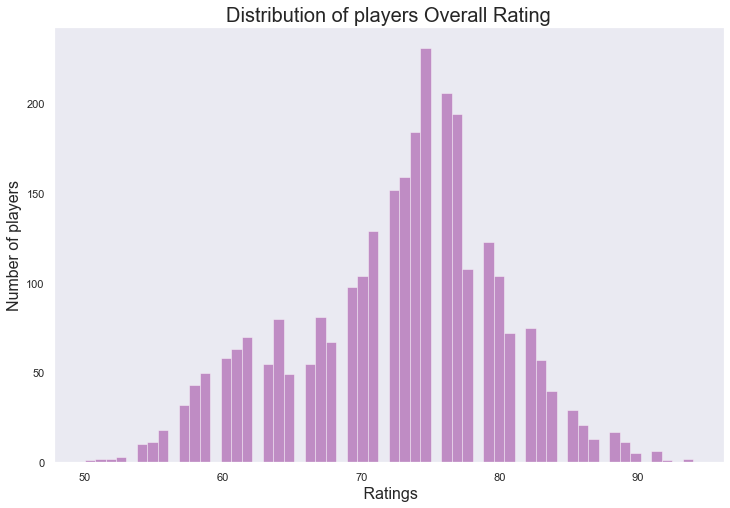

In [746]:
# Histogram: number of players's age
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = df.Overall
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='purple')
ax.set_xlabel(xlabel=" Ratings", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Distribution of players Overall Rating', fontsize=20)
plt.show()

In [432]:
bynations= df.groupby(by= "Nationality")
bynations.count

<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fbe19180890>>

In [757]:
byleauges= df.groupby(by='Playing_in_League')
byleauges['Name'].count()

Playing_in_League
English Premier League (1)    648
French Ligue 1 (1)            568
German 1. Bundesliga (1)      547
Italian Serie A (1)           545
Spain Primera Division (1)    583
Name: Name, dtype: int64

In [750]:
#Number of countires playing
len(df["Nationality"].unique())

100

In [755]:
#data frame of forigen players
df_for=df[(df["Nationality"]!='Spain')&(df["Nationality"]!='England')&
   (df["Nationality"]!='Germany')&(df["Nationality"]!='France')&(df["Nationality"]!='Italy')]


In [760]:
bynationsfor= df_for.groupby(by= 'Playing_in_League')
bynationsfor['Name'].count()

Playing_in_League
English Premier League (1)    302
French Ligue 1 (1)            239
German 1. Bundesliga (1)      238
Italian Serie A (1)           271
Spain Primera Division (1)    175
Name: Name, dtype: int64

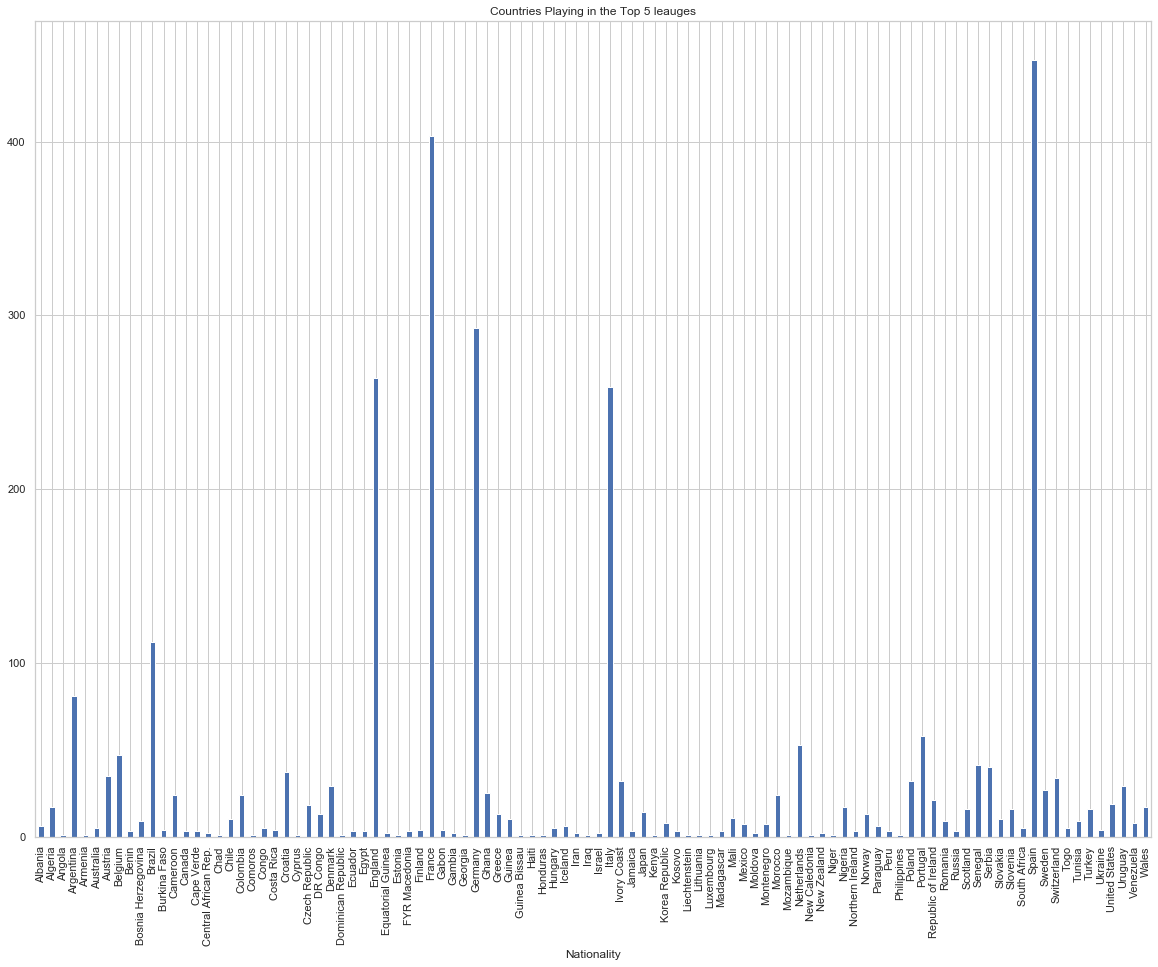

In [747]:
sns.set(style="whitegrid")
#sns.set_color_codes("Spectral")

plt.figure( figsize=(20,15))
#the_grid = GridSpec(2, 2)

plt.subplot(title='Countries Playing in the Top 5 leauges')
bynations['Name'].count().plot(kind = 'bar')
# sns.barplot(x='FoodCode',y='Source', data=df, palette='Spectral')
# plt.subplot(the_grid[0, 0], title='Selected Flavors of Pies')

# sns.barplot(x='Source',y='FoodCode', data=flavor_data, palette='Spectral')

# plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)

In [459]:
len(df['Nationality'].unique())

100

In [457]:
#grouped by league and nations
byleaugesnNa= df.groupby(by=['Playing_in_League', 'Nationality'])
plt.figure( figsize=(20,15))
lnun= byleaugesnNa.count()['Name'].unstack()
lnun

Nationality,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Belgium,Benin,Bosnia Herzegovina,Brazil,Burkina Faso,Cameroon,Canada,Cape Verde,Central African Rep.,Chad,Chile,Colombia,Comoros,Congo,Costa Rica,Croatia,Cyprus,Czech Republic,DR Congo,Denmark,Dominican Republic,Ecuador,Egypt,England,Equatorial Guinea,Estonia,FYR Macedonia,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guinea,Guinea Bissau,Haiti,Honduras,Hungary,Iceland,Iran,Iraq,Israel,Italy,Ivory Coast,Jamaica,Japan,Kenya,Korea Republic,Kosovo,Liechtenstein,Lithuania,Luxembourg,Madagascar,Mali,Mexico,Moldova,Montenegro,Morocco,Mozambique,Netherlands,New Caledonia,New Zealand,Niger,Nigeria,Northern Ireland,Norway,Paraguay,Peru,Philippines,Poland,Portugal,Republic of Ireland,Romania,Russia,Scotland,Senegal,Serbia,Slovakia,Slovenia,South Africa,Spain,Sweden,Switzerland,Togo,Tunisia,Turkey,Ukraine,United States,Uruguay,Venezuela,Wales
Playing_in_League,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
English Premier League (1),NaN,2.0,NaN,16.0,1.0,3.0,6.0,17.0,1.0,2.0,20.0,NaN,3.0,1.0,NaN,NaN,NaN,2.0,5.0,NaN,NaN,NaN,2.0,1.0,2.0,4.0,13.0,NaN,1.0,3.0,254.0,1.0,NaN,NaN,NaN,31.0,3.0,NaN,NaN,15.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,1.0,9.0,5.0,2.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,1.0,2.0,NaN,21.0,NaN,2.0,NaN,7.0,3.0,7.0,1.0,NaN,1.0,5.0,19.0,21.0,2.0,NaN,16.0,6.0,4.0,1.0,1.0,NaN,37.0,4.0,7.0,1.0,1.0,2.0,2.0,5.0,2.0,2.0,16.0
French Ligue 1 (1),NaN,7.0,NaN,6.0,NaN,NaN,NaN,13.0,2.0,NaN,27.0,3.0,11.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,4.0,NaN,4.0,NaN,2.0,6.0,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,310.0,1.0,NaN,NaN,3.0,1.0,2.0,4.0,1.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,6.0,16.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,NaN,3.0,8.0,NaN,NaN,1.0,11.0,1.0,3.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,3.0,10.0,NaN,1.0,1.0,NaN,20.0,7.0,2.0,3.0,4.0,7.0,5.0,3.0,2.0,8.0,2.0,NaN,2.0,3.0,NaN,NaN
German 1. Bundesliga (1),1.0,2.0,NaN,6.0,NaN,2.0,28.0,6.0,NaN,2.0,15.0,NaN,4.0,1.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,9.0,NaN,8.0,2.0,6.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,23.0,NaN,NaN,NaN,268.0,4.0,4.0,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,1.0,4.0,2.0,1.0,7.0,NaN,2.0,2.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,1.0,3.0,NaN,16.0,NaN,NaN,NaN,2.0,NaN,5.0,1.0,1.0,NaN,8.0,5.0,NaN,1.0,1.0,NaN,2.0,6.0,4.0,1.0,1.0,10.0,10.0,17.0,1.0,NaN,7.0,1.0,12.0,1.0,1.0,NaN
Italian Serie A (1),4.0,4.0,1.0,27.0,NaN,NaN,1.0,7.0,NaN,4.0,30.0,1.0,2.0,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,18.0,NaN,5.0,NaN,6.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,17.0,NaN,2.0,1.0,5.0,9.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,235.0,7.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,2.0,2.0,3.0,NaN,11.0,NaN,NaN,NaN,4.0,NaN,NaN,2.0,NaN,NaN,16.0,10.0,NaN,3.0,NaN,NaN,8.0,17.0,3.0,10.0,NaN,15.0,7.0,7.0,NaN,NaN,3.0,NaN,NaN,9.0,2.0,NaN
Spain Primera Division (1),1.0,2.0,NaN,26.0,NaN,NaN,NaN,4.0,NaN,1.0,20.0,NaN,4.0,NaN,NaN,1.0,NaN,4.0,11.0,NaN,1.0,2.0,4.0,NaN,1.0,1.0,2.0,1.0,NaN,NaN,1.0,1.0,NaN,2.0,NaN,22.0,NaN,NaN,NaN,2.0,7.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,5.0,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,2.0,1.0,NaN,NaN,14.0,NaN,2.0,1.0,NaN,5.0,6.0,NaN,1.0,NaN,378.0,1.0,NaN,1.0,NaN,2.0,1.0,NaN,14.0,3.0,1.0


<Figure size 1440x1080 with 0 Axes>

In [743]:
#grouped the data by continents and leuages
byleaugesnCo= df.groupby(by=['Playing_in_League', 'Continent'])
plt.figure( figsize=(20,15))
legCo= byleaugesnCo.count()['Name'].unstack(level='Continent').apply(lambda x:100 * x / float(x.sum()), axis=1)
legCo
#legCo(level='Playing_in_League').plot(kind='bar')
#data.groupby(['date','type']).count()['amount'].unstack().plot(ax=ax)

Continent,Africa,Asia,Australia Oceania,Europe,North America,South America
Playing_in_League,,,,,,
English Premier League (1),7.407407,1.543210,0.771605,81.172840,1.543210,7.561728
French Ligue 1 (1),21.164021,1.410935,0.176367,69.488536,0.705467,7.054674
German 1. Bundesliga (1),4.570384,3.290676,0.365631,83.729433,2.925046,5.118830
Italian Serie A (1),7.889908,0.733945,NaN,76.697248,0.366972,14.311927
Spain Primera Division (1),5.670103,1.202749,NaN,78.006873,1.202749,13.917526


<Figure size 1440x1080 with 0 Axes>

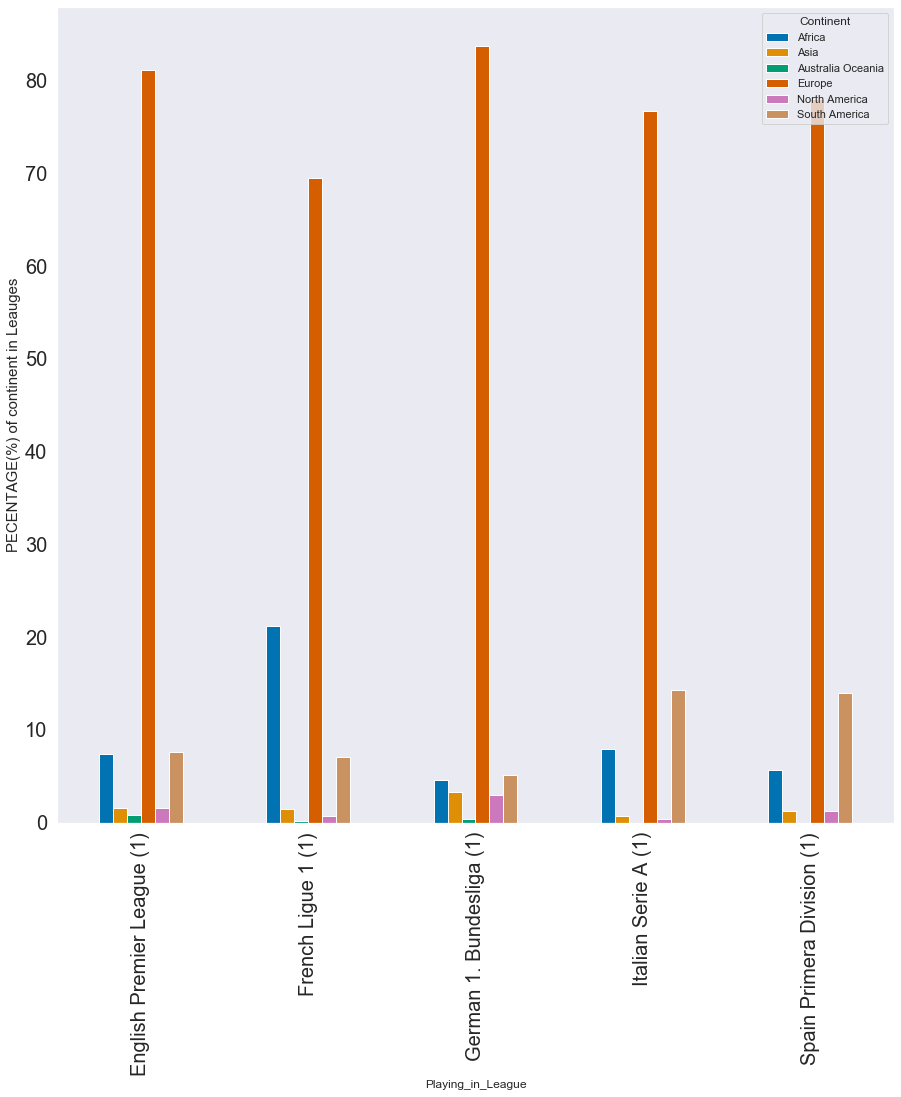

In [745]:
# the Spread of continets arcoss the top 5 leauges in europe, as expected 
legCo.plot(kind= "bar", figsize=(15,15), fontsize=20)
plt.ylabel('PECENTAGE(%) of continent in Leauges', fontsize= 15);


In [558]:
df['Playing_in_League'].unique()

array(['Spain Primera Division (1)', 'English Premier League (1)',
       'Italian Serie A (1)', 'French Ligue 1 (1)',
       'German 1. Bundesliga (1)'], dtype=object)

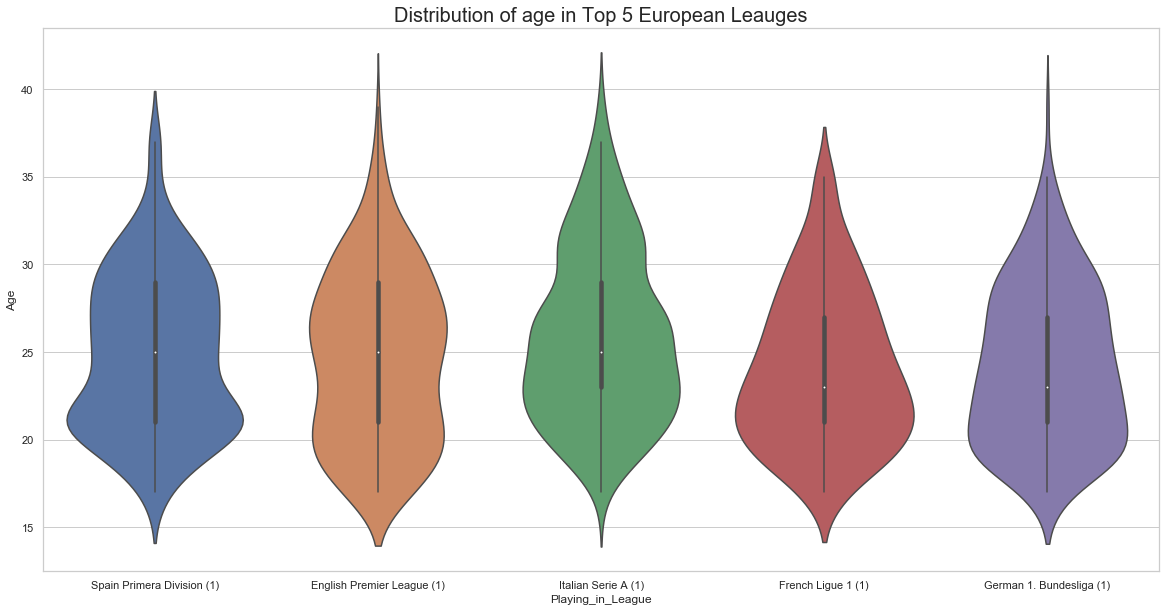

In [572]:
# Compare six clubs in relation to age
leauges = ['Spain Primera Division (1)', 'English Premier League (1)',
       'Italian Serie A (1)', 'French Ligue 1 (1)',
       'German 1. Bundesliga (1)']
df_club = df.loc[df['Playing_in_League'].isin(leauges) & df['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.violinplot(x='Playing_in_League', y="Age", data=df_club );
ax.set_title(label='Distribution of age in Top 5 European Leauges', fontsize=20);

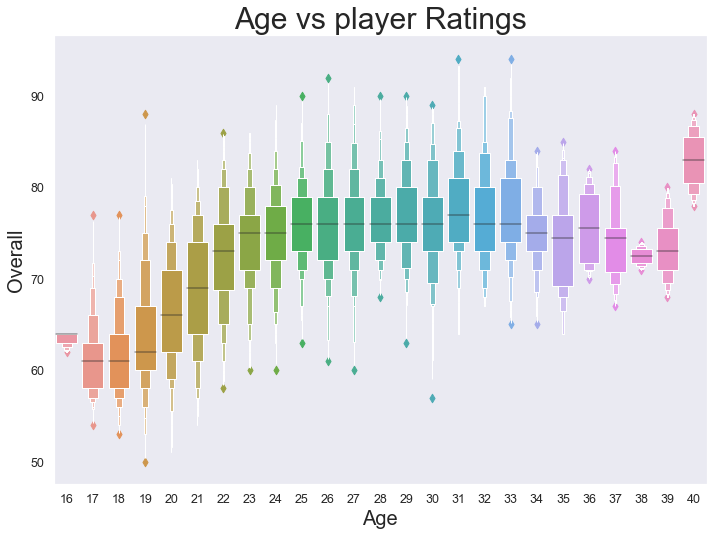

In [354]:

def sns_settings(title='', xtitle='', ytitle='', rotate = 0):
    sns.set(style='dark', palette='muted', color_codes=True)
    ax.axes.set_title(title, fontsize=30)
    ax.set_xlabel(xtitle, fontsize=20)
    ax.set_ylabel(ytitle, fontsize = 20)
    plt.yticks(fontsize='12.5') # ticks are scaling numbers
    plt.xticks(fontsize='12.5')
    a = plt.setp(ax.get_xticklabels(), rotation=rotate)

canvas = (11.7, 8.27) # A4 size    
fig, ax = plt.subplots(figsize=canvas) # hack to increase the size of figures or plots or canvas

sns_settings(title = 'Age vs player Ratings')
sns.boxenplot(data=df, x="Age", y="Overall")

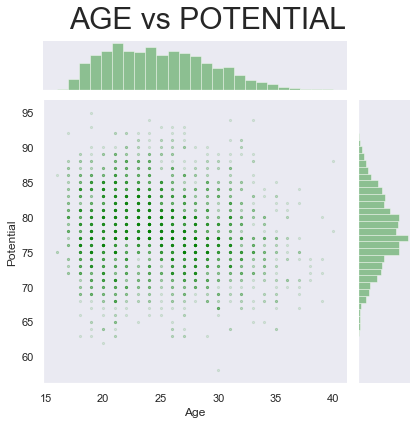

In [394]:
#visualization of age vs potential of players
g= sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'green'},
              marginal_kws={'color':'green'}, )#.set_title(title, fontsize=30)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('AGE vs POTENTIAL', fontsize=30); # can also get the figure from plt.gcf()


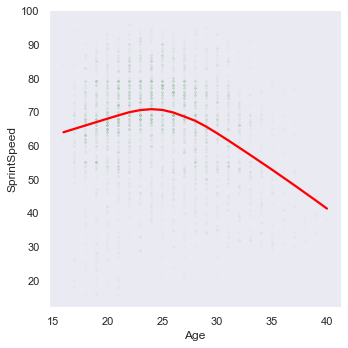

In [397]:
#visualization of age vs sprint speed
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})

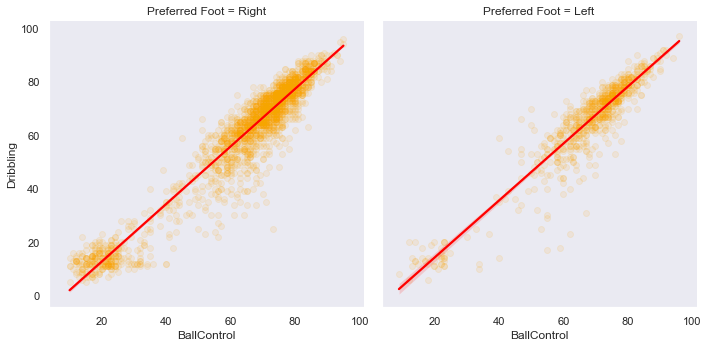

In [416]:

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})

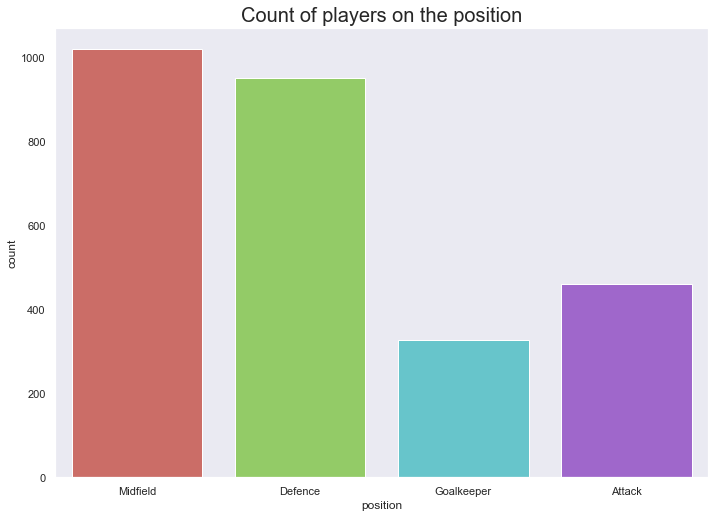

In [422]:
# All of position
fig, ax = plt.subplots(figsize=canvas)
ax = sns.countplot(x = 'position', data = df, palette = 'hls');
ax.set_title(label='Count of players on the position', fontsize=20);


In [ ]:

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r



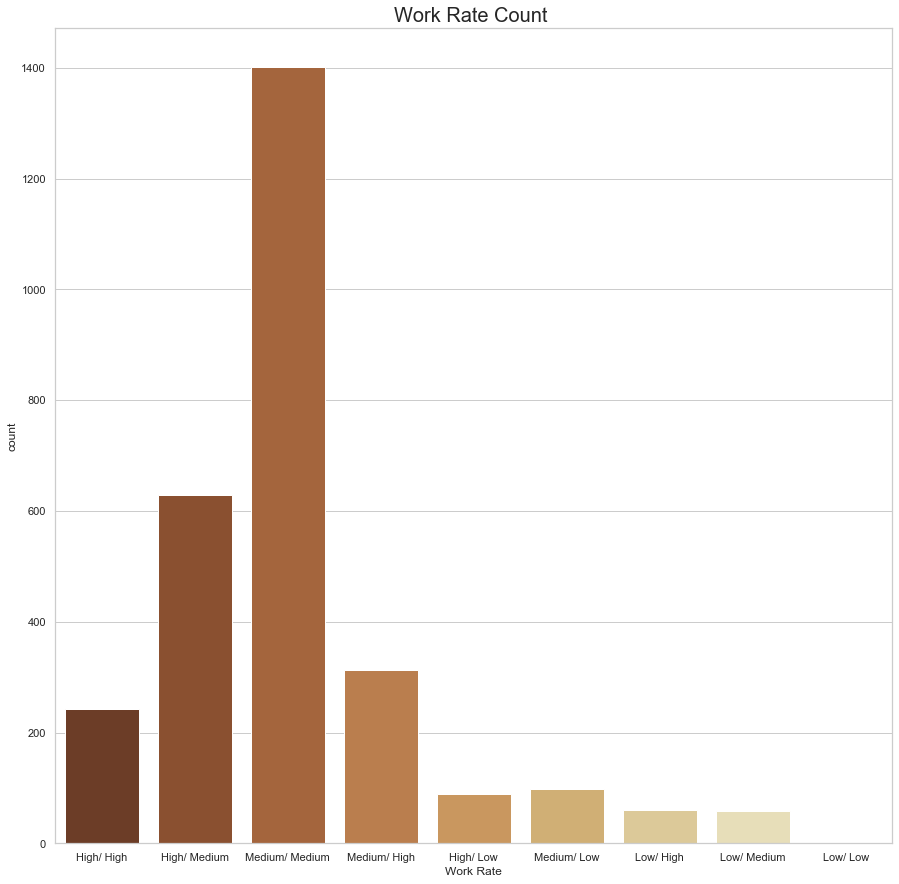

In [769]:

#work rates and its distribution in the data
fig2, ax = plt.subplots(figsize=(15,15))
ax = sns.countplot(x = 'Work Rate', data = df, palette = 'YlOrBr_r', saturation=0.5);
ax.set_title(label='Work Rate Count ', fontsize=20);


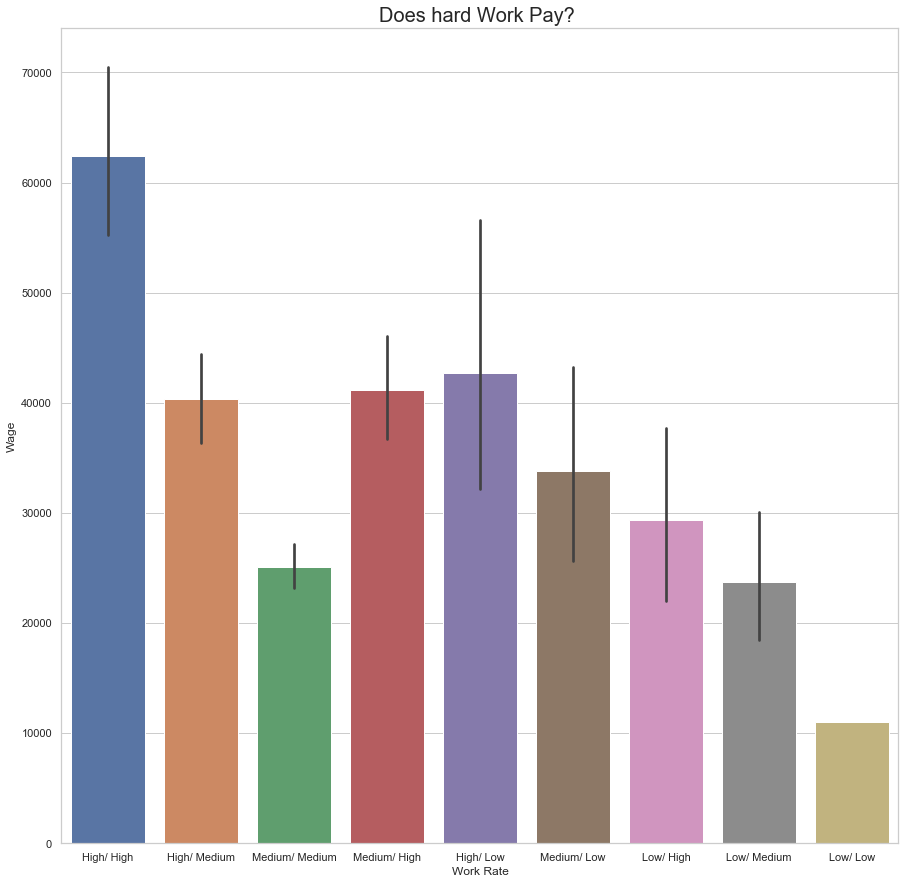

In [768]:
fig3, ax = plt.subplots(figsize=(15,15))
sns.barplot(data = df, x = 'Work Rate', y = 'Wage')
ax.set_title(label='Does hard Work Pay? ', fontsize=20);

In [ ]:
precent

# Checking features for linear relationships

In [399]:
df.columns

Index(['Club', 'Playing_in_League', 'ID', 'Name', 'Age', 'Nationality',
       'Overall', 'Potential', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Contract Valid Until', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', '

In [413]:
features= [ 'Age',
       'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Skill Moves',
       'Height',
       'Weight','Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'years_left_contract']

In [414]:
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

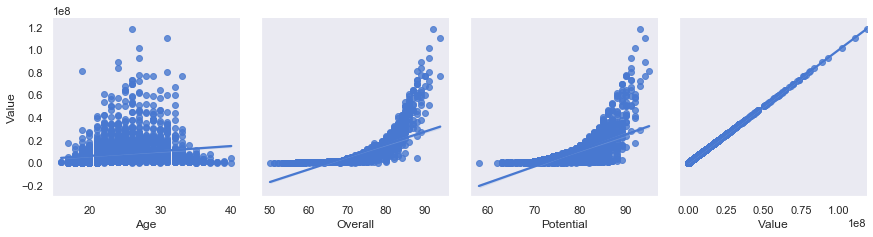

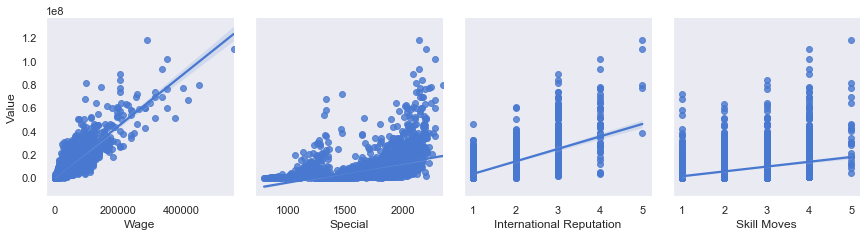

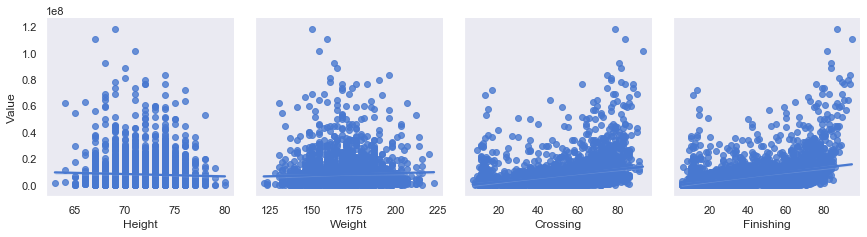

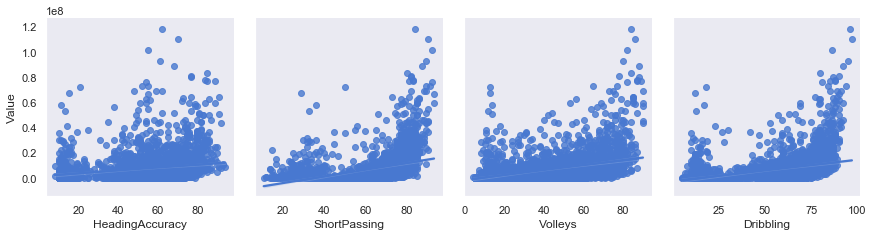

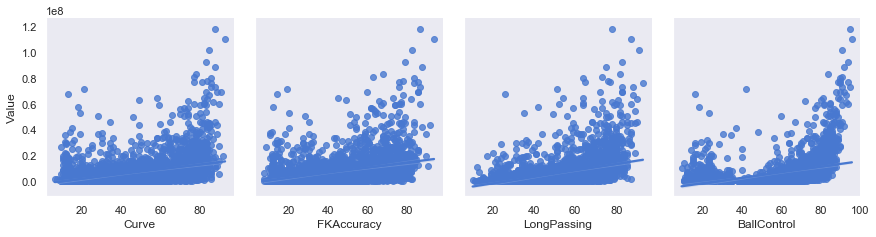

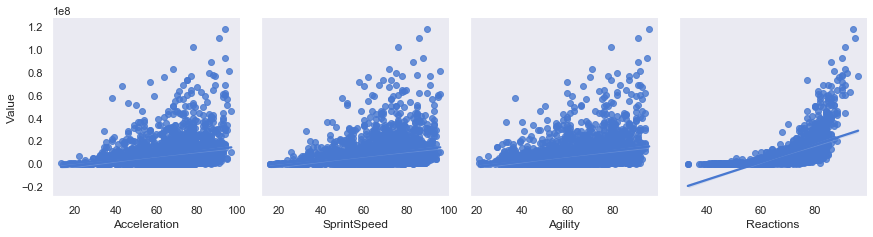

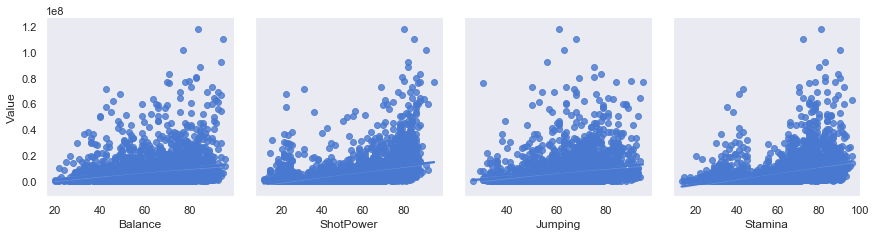

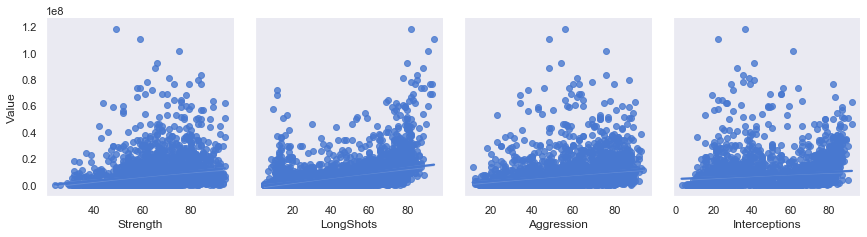

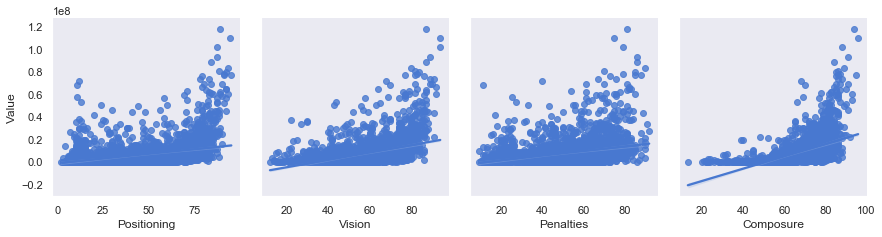

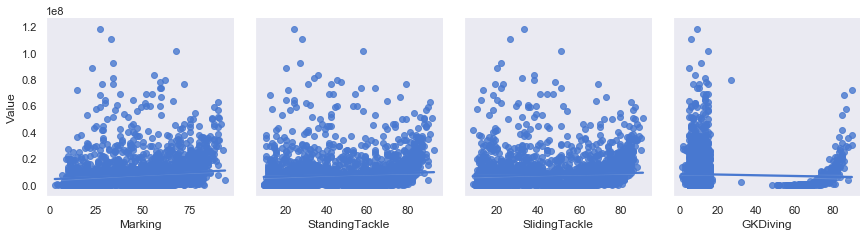

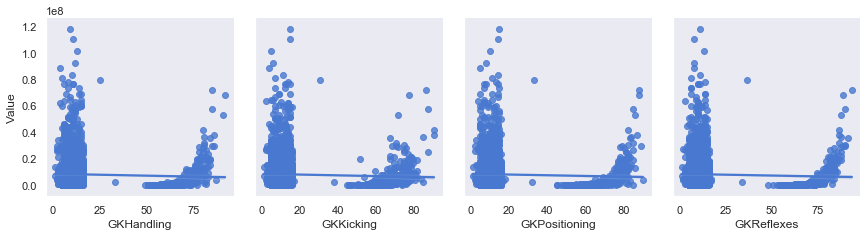

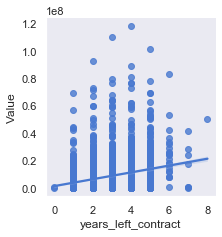

In [415]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['Value'],x_vars=i, kind="reg", height=3)

# Checking for Colinearity

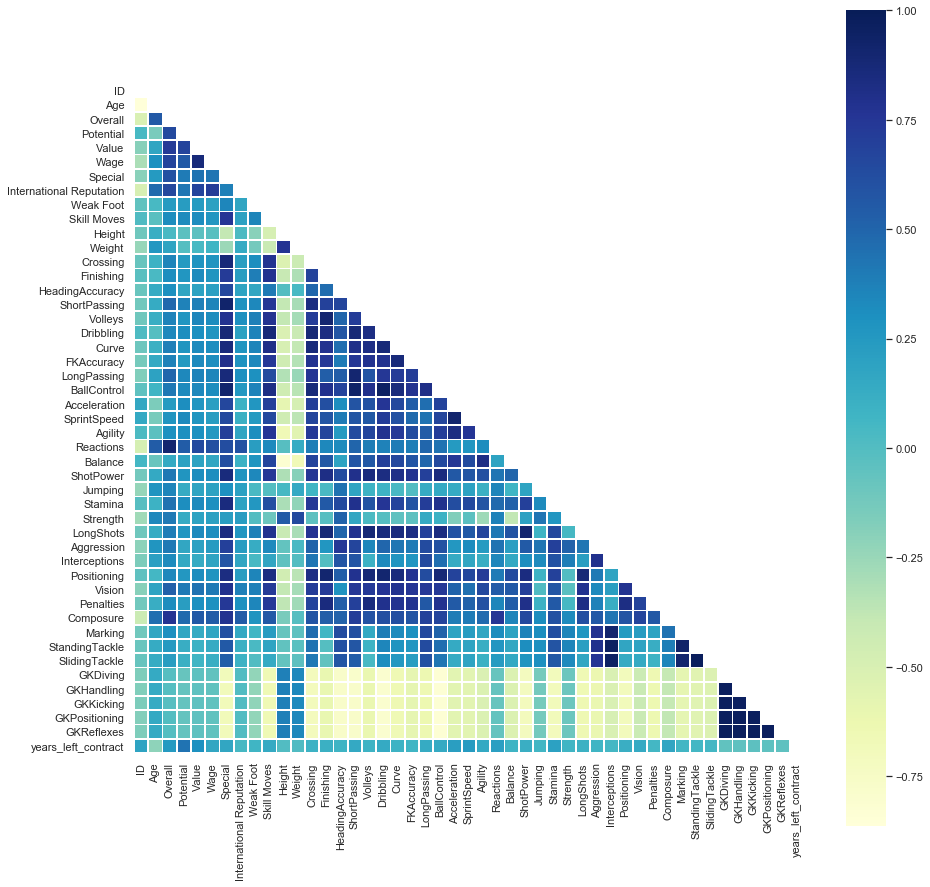

In [417]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

# Creating Dummy Variables and Transforming Features with non linear relationships

In [810]:
features1=['Club', 'Playing_in_League', 'Age', 'Nationality',
       'Overall', 'Potential', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Height',
       'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'years_left_contract',
       'Continent', 'position']

In [862]:
df_t= df[features1]

In [863]:
#Dummy Variables for work rates
pd.get_dummies(df_t['Work Rate']).head(10)
df_t= pd.concat([df_t, pd.get_dummies(df_t['Work Rate'])], 1)


In [864]:

df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2891 entries, 0 to 8391
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Club                      2891 non-null   object
 1   Playing_in_League         2891 non-null   object
 2   Age                       2891 non-null   object
 3   Nationality               2891 non-null   object
 4   Overall                   2891 non-null   object
 5   Potential                 2891 non-null   object
 6   Wage                      2891 non-null   object
 7   Special                   2891 non-null   object
 8   Preferred Foot            2891 non-null   object
 9   International Reputation  2891 non-null   object
 10  Weak Foot                 2891 non-null   object
 11  Skill Moves               2891 non-null   object
 12  Work Rate                 2891 non-null   object
 13  Body Type                 2891 non-null   object
 14  Height                  

In [865]:
#dummy variables for position
pd.get_dummies(df_t['position'])
df_t= pd.concat([df_t, pd.get_dummies(df_t['position'])], 1)


In [866]:
#dummy Variables for continent 
pd.get_dummies(df_t['Continent']).head(10)
df_t= pd.concat([df_t, pd.get_dummies(df_t['Continent'])], 1)


In [867]:
#Dummy varribales for 'Body Type'
pd.get_dummies(df_t['Body Type']).head(10)
df_t= pd.concat([df_t, pd.get_dummies(df_t['Body Type'])], 1)


In [868]:
#dummy varribales for 'Nationality'
pd.get_dummies(df_t['Nationality'])
df_t= pd.concat([df_t, pd.get_dummies(df_t['Nationality'])], 1)


In [869]:
#dummy varribles for 'Playing_in_League'
pd.get_dummies(df_t['Playing_in_League'])
df_t= pd.concat([df_t, pd.get_dummies(df_t['Playing_in_League'])], 1)


In [870]:
#dummy varribales for clubs
pd.get_dummies(df_t['Club'])
df_t= pd.concat([df_t, pd.get_dummies(df_t['Club'])], 1)


In [871]:
#dummy varrible for prefered foot
pd.get_dummies(df_t['Preferred Foot'])
df_t= pd.concat([df_t, pd.get_dummies(df_t['Preferred Foot'])], 1)

In [872]:
#features without the categorical variables because dummy varribles already present
feature2= ['Age',
       'Overall', 'Potential', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'years_left_contract']

In [873]:
#DATAFRAME with Categorical varriables transformed to dummy
df4=df_t

In [874]:
x2= (df['Overall']).apply(lambda x:np.power(x,9))

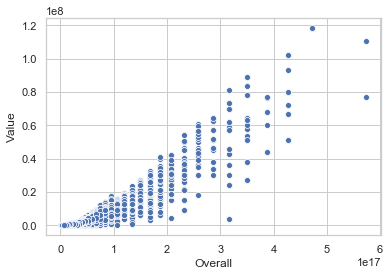

In [875]:
 pp2 = sns.scatterplot(data=df, y=df['Value'], x= x2)

# Train Test Split

In [876]:
df4

,Club,Playing_in_League,Age,Nationality,Overall,Potential,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,...,Leicester City,Levante UD,Liverpool,Manchester City,Manchester United,Milan,Montpellier HSC,Napoli,Newcastle United,Nîmes Olympique,OGC Nice,Olympique Lyonnais,Olympique de Marseille,Paris Saint-Germain,Parma,RB Leipzig,RC Strasbourg Alsace,RCD Espanyol,Rayo Vallecano,Real Betis,Real Madrid,Real Sociedad,Real Valladolid CF,Roma,SC Freiburg,SD Eibar,SD Huesca,SPAL,SV Werder Bremen,Sampdoria,Sassuolo,Sevilla FC,Southampton,Stade Malherbe Caen,Stade Rennais FC,Stade de Reims,TSG 1899 Hoffenheim,Torino,Tottenham Hotspur,Toulouse Football Club,Udinese,Valencia CF,VfB Stuttgart,VfL Wolfsburg,Villarreal CF,Watford,West Ham United,Wolverhampton Wanderers,Left,Right
0,Real Madrid,Spain Primera Division (1),32,Croatia,91,91,420000,2280,Right,4,4,4,High/ High,Lean,68,146,86,72,55,93,76,90,85,78,88,93,80,72,93,90,94,79,68,89,58,82,62,83,79,92,82,84,60,76,73,13,9,7,14,9,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Real Madrid,Spain Primera Division (1),32,Spain,91,91,380000,2201,Right,4,3,3,High/ Medium,Normal,72,181,66,60,91,78,66,63,74,72,77,84,76,75,78,85,66,79,93,84,83,59,88,90,60,63,75,82,87,92,91,11,8,9,7,11,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Real Madrid,Spain Primera Division (1),28,Germany,90,90,355000,2190,Right,4,5,3,Medium/ Medium,Normal,72,168,88,76,54,92,82,81,86,84,93,90,64,62,70,89,71,87,30,75,73,92,60,82,79,86,73,85,72,79,69,10,11,13,7,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Real Madrid,Spain Primera Division (1),26,Belgium,89,90,240000,1311,Left,4,2,1,Medium/ Medium,Normal,78,212,14,14,13,33,12,13,19,20,35,23,46,52,61,84,45,36,68,38,70,17,23,15,13,44,27,66,20,18,16,85,91,72,86,88,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Real Madrid,Spain Primera Division (1),26,Brazil,88,90,285000,2170,Right,3,3,2,Medium/ High,Normal,73,185,52,59,76,85,53,69,59,74,82,78,59,65,62,84,66,86,88,87,89,79,87,87,69,77,66,84,88,90,87,13,14,16,12,12,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,Frosinone,Italian Serie A (1),19,Italy,64,80,6000,1464,Right,1,3,3,Medium/ Medium,Lean,74,159,40,69,65,53,51,63,43,43,36,67,54,53,64,59,64,65,65,48,66,60,37,16,63,45,65,56,15,19,19,14,10,15,7,11,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8388,Frosinone,Italian Serie A (1),21,Italy,63,75,2000,1655,Right,1,2,2,Medium/ Medium,Normal,74,176,63,60,48,57,50,57,49,40,49,65,76,78,67,63,59,60,41,54,65,42,48,60,63,58,59,53,55,62,59,7,13,7,7,14,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8389,Frosinone,Italian Serie A (1),20,Italy,61,73,2000,1472,Right,1,3,3,High/ Low,Normal,69,143,58,57,43,60,50,68,51,40,47,67,69,67,76,54,86,64,47,34,42,49,39,25,58,55,50,57,17,28,22,15,6,5,12,11,...,0,0,0,0,0,0,0,0,0,0,0,0,

In [877]:
df4.drop(columns= ['Club','position', 'Preferred Foot','Playing_in_League','Nationality','Body Type', 'Continent','Work Rate'], inplace= True) #'position', 'Preferred Foot','Playing_in_League','Nationality','Body Type', 'Continent'

In [878]:
#asign traget column to a variable
target =df['Value']

In [879]:
type(Y), type(X)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [880]:
X_train, X_test, y_train, y_test = train_test_split(df4, target, random_state=22,test_size=0.2)

# Scalar transformation

In [881]:
#transform to scalar

scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df4.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df4.columns)

In [882]:
X_train

,Age,Overall,Potential,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,years_left_contract,High/ High,High/ Low,High/ Medium,Low/ High,Low/ Low,...,Leicester City,Levante UD,Liverpool,Manchester City,Manchester United,Milan,Montpellier HSC,Napoli,Newcastle United,Nîmes Olympique,OGC Nice,Olympique Lyonnais,Olympique de Marseille,Paris Saint-Germain,Parma,RB Leipzig,RC Strasbourg Alsace,RCD Espanyol,Rayo Vallecano,Real Betis,Real Madrid,Real Sociedad,Real Valladolid CF,Roma,SC Freiburg,SD Eibar,SD Huesca,SPAL,SV Werder Bremen,Sampdoria,Sassuolo,Sevilla FC,Southampton,Stade Malherbe Caen,Stade Rennais FC,Stade de Reims,TSG 1899 Hoffenheim,Torino,Tottenham Hotspur,Toulouse Football Club,Udinese,Valencia CF,VfB Stuttgart,VfL Wolfsburg,Villarreal CF,Watford,West Ham United,Wolverhampton Wanderers,Left,Right
0,0.046751,0.041773,-0.197171,-0.538014,0.449728,-0.633834,1.358352,0.392142,-1.054906,-1.400781,0.411150,1.059602,0.759379,-0.008700,0.978690,0.449874,0.625770,0.763147,-0.093362,0.268217,0.734254,0.601366,0.379661,0.334564,0.847142,0.584189,0.811982,0.206838,0.247416,0.765564,1.078731,-0.624967,0.818969,0.314832,1.066950,0.292825,-0.932302,-0.874468,-0.944880,-0.227817,-0.374416,-0.262481,-0.580280,-0.374403,-1.211252,-0.307729,-0.175392,1.867972,-0.139285,-0.020802,...,-0.102418,-0.110721,-0.104553,-0.110721,-0.106647,-0.10024,-0.102418,-0.095741,-0.108702,-0.102418,-0.098015,-0.098015,-0.106647,-0.10024,-0.095741,-0.088581,-0.10024,-0.102418,-0.108702,-0.091028,-0.110721,-0.088581,-0.104553,-0.091028,-0.098015,-0.102418,-0.104553,-0.098015,-0.10024,-0.088581,-0.10024,-0.102418,-0.106647,-0.095741,-0.098015,-0.10024,-0.106647,-0.086066,-0.106647,-0.102418,-0.098015,-0.110721,-0.098015,-0.108702,-0.108702,-0.102418,-0.102418,-0.102418,-0.592003,0.592003
1,1.142979,0.586646,-0.197171,-0.296738,1.165555,-0.633834,1.358352,1.518392,-0.285645,0.375570,0.850780,1.059602,0.396549,0.617927,1.177428,0.885168,1.017759,1.124968,0.701562,0.757441,0.057625,0.462670,1.349502,0.749149,0.778703,0.637682,-0.286350,1.320247,0.329064,0.718223,0.536763,0.448559,0.864831,1.289600,1.242890,0.725034,0.637311,0.522491,0.209512,-0.178244,-0.166789,-0.534102,-0.067237,-0.325559,-0.465271,-0.307729,-0.175392,-0.535340,-0.139285,-0.020802,...,-0.102418,-0.110721,-0.104553,-0.110721,-0.106647,-0.10024,-0.102418,-0.095741,-0.108702,-0.102418,-0.098015,-0.098015,-0.106647,-0.10024,-0.095741,-0.088581,-0.10024,-0.102418,9.199436,-0.091028,-0.110721,-0.088581,-0.104553,-0.091028,-0.098015,-0.102418,-0.104553,-0.098015,-0.10024,-0.088581,-0.10024,-0.102418,-0.106647,-0.095741,-0.098015,-0.10024,-0.106647,-0.086066,-0.106647,-0.102418,-0.098015,-0.110721,-0.098015,-0.108702,-0.108702,-0.102418,-0.102418,-0.102418,-0.592003,0.592003
2,-0.172495,1.131520,1.107949,0.427091,1.278755,0.760480,1.358352,0.392142,-0.670276,0.121806,0.704237,1.337451,-0.018115,0.868578,1.475534,0.836802,1.017759,0.814835,0.518118,0.866157,1.140231,0.740063,0.656758,1.681966,0.984020,1.333090,0.727495,1.196534,0.737304,1.333655,0.536763,0.147972,1.185865,1.289600,0.773718,0.811475,0.278542,0.111621,0.044599,-0.326963,-0.218696,-0.153832,-0.118541,-0.227870,1.026693,3.249615,-0.175392,-0.535340,-0.139285,-0.020802,...,-0.102418,-0.110721,-0.104553,-0.110721,-0.106647,-0.10024,-0.102418,-0.095741,-0.108702,-0.102418,-0.098015,-0.098015,-0.106647,-0.10024,-0.095741,11.289129,-0.10024,-0.102418,-0.108702,-0.091028,-0.110721,-0.088581,-0.104553,-0.091028,-0.098015,-0.102418,-0.104553,-0.098015,-0.10024,-0.088581,-0.10024,-0.102418,-0.106647,-0.095741,-0.098015,-0.10024,-0.106647,-0.086066,-0.106647,-0.102418,-0.09

# MODELLING

In [859]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# building a linear regression model using statsmodel 
# lr_model = ols(formula='X_train ~y_train', data=scaler2.transform(X_train)).fit()

# lr_model.summary()
#X_train.convert_objects(convert_numeric=True)

X= sm.add_constant(X_train)
Y=y_train
lr_model=sm.OLS(Y,X).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [836]:
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 3926380.5009672665


In [834]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8831098734233795

In [841]:
type(y_train),  type(y_train_pred)

(pandas.core.series.Series, numpy.ndarray)

TypeError: No loop matching the specified signature and casting was found for ufunc svd_n_s

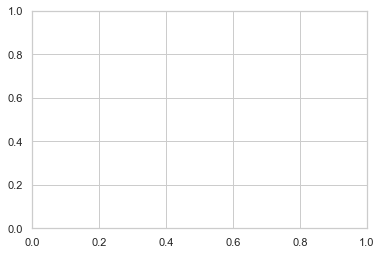

In [839]:
sns.residplot(y_train, y_train_pred,lowess=True, color="g")

# Testing

In [829]:
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 3.3903868807301276e+16
Training:  3926380 vs. Testing:  33903868807301276


# LASSO 

In [883]:
#LASSO
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y2_train_pred = lasso.predict(X_train)
y2_pred = lasso.predict(X_test)

trainLASS_rmse = metrics.mean_absolute_error(y_train, y2_train_pred)
testLASS_rmse = np.sqrt(metrics.mean_squared_error(y_test, y2_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )


Training Error: 3926380.5009672665
Testing Error: 3.3903868807301276e+16


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7817480849471348e+16, tolerance: 30492621950376.3
  positive)


In [885]:
r2_score(y_train, y2_train_pred)

0.8830357613792753

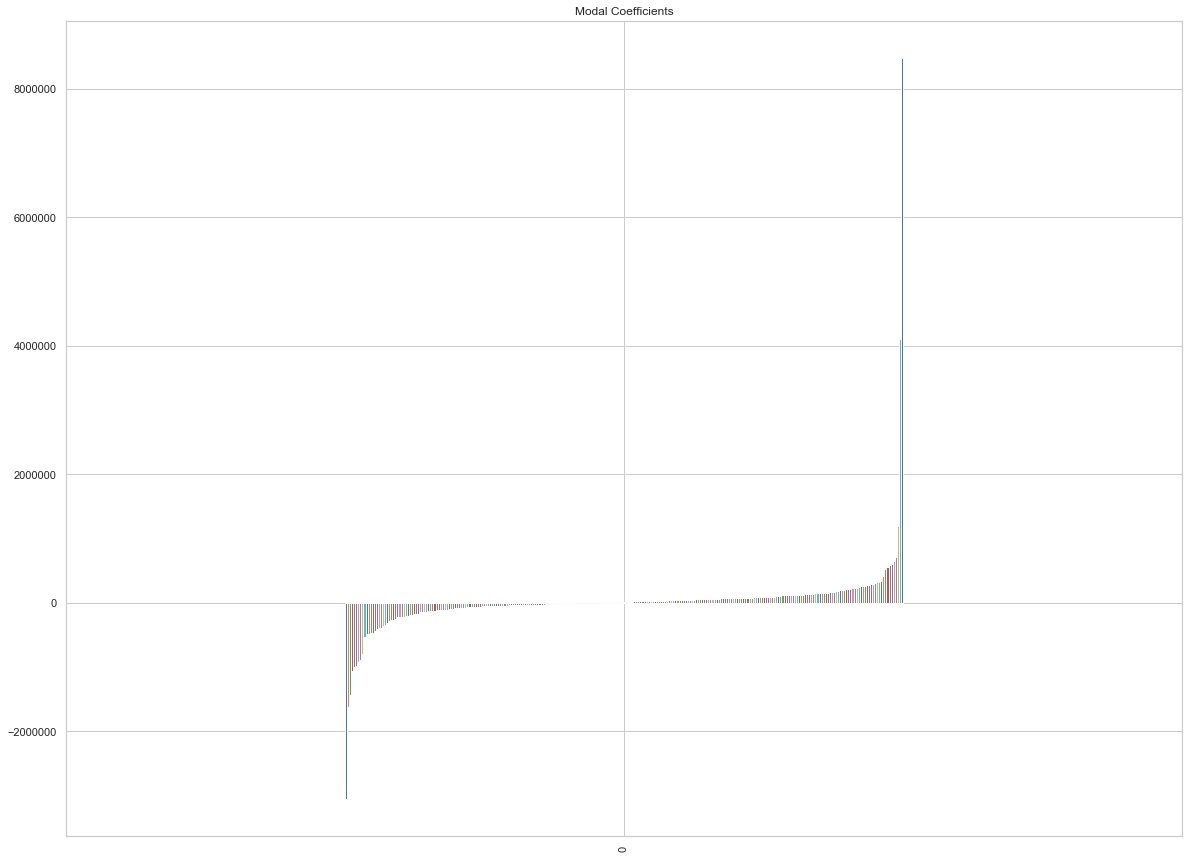

In [891]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(20,15))